<a href="https://colab.research.google.com/github/AmaniAlqarni/AI-Models/blob/main/DecisionTreeclassification_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 (Descriptions of data):
The iris dataset contains three classes of different flowers,
every flower has 50 instances, total of 150 instances.

"Features"
1: Sepal Length
2: Sepal Width
3: Petal Length
4: Petal Width

"Labels"

1: iris Setosa

2: iris Versicolour

3: iris Virginica

# Question 2 (classification task, why a decision tree is a reasonable model):

"classification task"
A predictive modeling problem where a class
label(iris Setosa,iris Versicolour, iris Virginica) is predicted for a
given example of features(Sepal Length, Sepal Width, Petal Length, Petal Width).

"why a decision tree is a reasonable model"
The tree probably will not be very deep with 4 types of features for classification.
The data set is small with all values given for each folwer,
so finding the root will be easier to find. Information gain is
an advantage to decide which of the four inputs are not important
in finding the flower species.

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

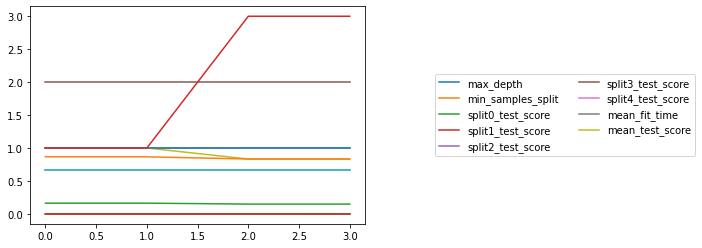

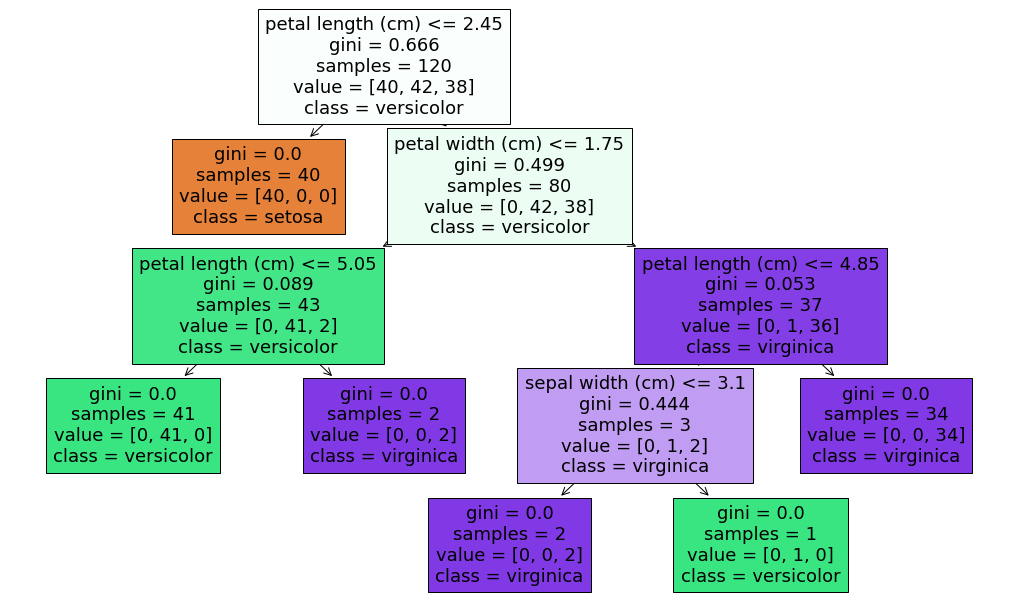

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import ParameterGrid


iris = load_iris()
x = iris.data
y = iris.target

print(iris)
# Question_3
# split the data into 80:10:10 for train:valid:test dataset
# Firs, split the data into training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(x, y,
    train_size=0.8)

# Since the valid and test size to is equal (10% each of overall data)
# So, valid_size = 0.5 (that is 50% of remaining data)
# X_validation, X_test, y_validation, y_test = train_test_split(X_remaining,y_remaining, test_size=0.5)


# Question_4
# Fitting Decision tree classifier on the training dataset
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


# Question_5
# Hyperparameter using cross validation k=5

# criteria to be tested
# criteria = ["gini", "entropy"]

# 2 choices of Hyperparameter
param_grid = {"criterion": ["gini", "entropy"] ,
              "min_samples_split": [2],
              "max_depth": [None, 3]
                }

#setting grid with estimator
grid = GridSearchCV(estimator=tree.DecisionTreeClassifier(),
                    param_grid=param_grid,
                    cv = 5,
                    scoring='accuracy')

#creating preprocessing using pipeline
tree_model = make_pipeline(preprocessing.StandardScaler(), grid)

#fitting data
tree_model.fit(X_train, y_train)
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)
print("")

param_size = ParameterGrid(param_grid)
print(len(param_size))



# Question_6
# Test hyperparameter on test data
tree_model.fit(X_test, y_test)
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)
print("")


# Generating Plot
# df = df.drop(columns=['std_fit_time', 'std_test_score'])
df = pd.DataFrame(grid.cv_results_)
df.plot()
plt.legend(['max_depth', "min_samples_split", 'split0_test_score', 'split1_test_score', 'split2_test_score',
            'split3_test_score','split4_test_score','mean_fit_time', 'mean_test_score' ],loc = 7, bbox_to_anchor=(2.0, 0.5), ncol= 2)
plt.show()
print("")



# Question_7
%matplotlib inline
f = plt.figure(figsize=(18,11))
_ = plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)


